# Predict cats and dogs

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import  os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [38]:
X_test=[]
img_size=100
path = "F:/Dataset/dogs-cats-images/dataset/predict/"
for img in os.listdir(path):
    image = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    r_image = cv2.resize(image,(img_size,img_size))
    X_test.append(r_image)

In [39]:
X_test_np = np.array(X_test).reshape(-1,img_size,img_size,1)

In [40]:


model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=(100,100,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [41]:
model.load_weights('./catsAndDogs.h5')

In [42]:
output = model.predict(X_test_np)

In [43]:
output


array([[1.]], dtype=float32)

CAT


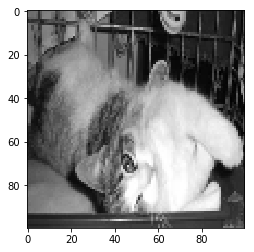

In [44]:
for i in range(len(X_test)):
    if output[i][0] == 0.0:
        print("DOG") 
    else:
        print("CAT")
    plt.imshow(X_test[i],cmap="gray")
    plt.show()